# Train and test the model

In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
from tqdm import tqdm

# functions from other notebooks
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import classifier
# from ipynb.fs.full.generate_data import convert, visualize

Using TensorFlow backend.


# Data

In [2]:
# load data
f_path = 'c_data_2B.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [3]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'c_testdata_2B.h5'
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

C:\Users\Ruining\.conda\envs\machine_learning\lib\site-packages\pandas\core\generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167

In [4]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

# one hot code y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model

In [5]:
# Check model performance accuracy before

model = load_model('classify2A.h5')

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1800/1800 [==============================] - ETA: 1: - ETA: 28s - ETA: 18 - ETA: 12 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 2ms/step


In [6]:
# fit network

epoch = 150
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='val_acc',verbose=1,min_delta=0.5,patience=20,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Train on 12960 samples, validate on 3240 samples
Epoch 1/150
 6695/12960 [==============>...............] - ETA: 10:48 - loss: 1.1921e-07 - acc: 1.00 - ETA: 1:41 - loss: 1.3113e-07 - acc: 1.0000 - ETA: 1:05 - loss: 1.2557e-07 - acc: 1.000 - ETA: 51s - loss: 1.3655e-07 - acc: 1.000 - ETA: 44s - loss: 1.8210e-07 - acc: 1.00 - ETA: 39s - loss: 1.6987e-07 - acc: 1.00 - ETA: 36s - loss: 1.7327e-07 - acc: 1.00 - ETA: 34s - loss: 1.6570e-07 - acc: 1.00 - ETA: 33s - loss: 2.6979e-07 - acc: 1.00 - ETA: 31s - loss: 1.8841e-06 - acc: 1.00 - ETA: 30s - loss: 0.0454 - acc: 0.9972   - ETA: 29s - loss: 0.0470 - acc: 0.99 - ETA: 28s - loss: 0.0431 - acc: 0.99 - ETA: 27s - loss: 0.0394 - acc: 0.99 - ETA: 27s - loss: 0.0370 - acc: 0.99 - ETA: 27s - loss: 0.0346 - acc: 0.99 - ETA: 26s - loss: 0.0395 - acc: 0.99 - ETA: 26s - loss: 0.0378 - acc: 0.99 - ETA: 25s - loss: 0.0363 - acc: 0.99 - ETA: 25s - loss: 0.0346 - acc: 0.99 - ETA: 25s - loss: 0.0327 - acc: 0.99 - ETA: 25s - loss: 0.0335 - acc: 0.99 - ETA:

 6575/12960 [==============>...............] - ETA: 34s - loss: 0.0014 - acc: 1.00 - ETA: 22s - loss: 4.8638e-04 - acc: 1.00 - ETA: 22s - loss: 3.7616e-04 - acc: 1.00 - ETA: 22s - loss: 3.6745e-04 - acc: 1.00 - ETA: 22s - loss: 2.9531e-04 - acc: 1.00 - ETA: 22s - loss: 3.2774e-04 - acc: 1.00 - ETA: 22s - loss: 3.2065e-04 - acc: 1.00 - ETA: 22s - loss: 3.0845e-04 - acc: 1.00 - ETA: 22s - loss: 3.1112e-04 - acc: 1.00 - ETA: 22s - loss: 3.4089e-04 - acc: 1.00 - ETA: 22s - loss: 3.3359e-04 - acc: 1.00 - ETA: 22s - loss: 4.0836e-04 - acc: 1.00 - ETA: 22s - loss: 3.9421e-04 - acc: 1.00 - ETA: 21s - loss: 3.8820e-04 - acc: 1.00 - ETA: 21s - loss: 3.7582e-04 - acc: 1.00 - ETA: 21s - loss: 3.8608e-04 - acc: 1.00 - ETA: 21s - loss: 4.1089e-04 - acc: 1.00 - ETA: 21s - loss: 4.0353e-04 - acc: 1.00 - ETA: 21s - loss: 4.0370e-04 - acc: 1.00 - ETA: 21s - loss: 3.9829e-04 - acc: 1.00 - ETA: 21s - loss: 3.9052e-04 - acc: 1.00 - ETA: 21s - loss: 3.8233e-04 - acc: 1.00 - ETA: 21s - loss: 3.6944e-04 - acc

12960/12960 [==============================] - ETA: 11s - loss: 0.0052 - acc: 0.99 - ETA: 11s - loss: 0.0051 - acc: 0.99 - ETA: 11s - loss: 0.0051 - acc: 0.99 - ETA: 10s - loss: 0.0051 - acc: 0.99 - ETA: 10s - loss: 0.0051 - acc: 0.99 - ETA: 10s - loss: 0.0051 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0053 - acc: 0.99 - ETA: 10s - loss: 0.0052 - acc: 0.99 - ETA: 10s - loss: 0.0052 - acc: 0.99 - ETA: 10s - loss: 0.0052 - acc: 0.99 - ETA: 10s - loss: 0.0052 - acc: 0.99 - ETA: 9s - loss: 0.0052 - acc: 0.9996 - ETA: 9s - loss: 0.0051 - acc: 0.999 - ETA: 9s - loss: 0.0051 - acc: 0.999 - ET

 6415/12960 [=============>................] - ETA: 55s - loss: 1.1921e-07 - acc: 1.00 - ETA: 27s - loss: 1.2262e-07 - acc: 1.00 - ETA: 24s - loss: 1.8753e-06 - acc: 1.00 - ETA: 24s - loss: 2.3936e-06 - acc: 1.00 - ETA: 23s - loss: 2.2297e-06 - acc: 1.00 - ETA: 23s - loss: 2.4930e-06 - acc: 1.00 - ETA: 22s - loss: 2.1645e-06 - acc: 1.00 - ETA: 22s - loss: 1.8955e-06 - acc: 1.00 - ETA: 22s - loss: 1.7433e-06 - acc: 1.00 - ETA: 22s - loss: 1.7880e-06 - acc: 1.00 - ETA: 22s - loss: 1.6979e-06 - acc: 1.00 - ETA: 22s - loss: 1.5627e-06 - acc: 1.00 - ETA: 22s - loss: 1.7526e-06 - acc: 1.00 - ETA: 22s - loss: 1.6650e-06 - acc: 1.00 - ETA: 22s - loss: 1.5865e-06 - acc: 1.00 - ETA: 22s - loss: 1.5564e-06 - acc: 1.00 - ETA: 21s - loss: 1.6611e-06 - acc: 1.00 - ETA: 21s - loss: 1.6227e-06 - acc: 1.00 - ETA: 21s - loss: 1.5671e-06 - acc: 1.00 - ETA: 21s - loss: 1.5361e-06 - acc: 1.00 - ETA: 21s - loss: 1.5459e-06 - acc: 1.00 - ETA: 21s - loss: 1.5020e-06 - acc: 1.00 - ETA: 21s - loss: 1.5184e-06 -

12960/12960 [==============================] - ETA: 11s - loss: 0.0026 - acc: 0.99 - ETA: 11s - loss: 0.0026 - acc: 0.99 - ETA: 11s - loss: 0.0025 - acc: 0.99 - ETA: 11s - loss: 0.0025 - acc: 0.99 - ETA: 11s - loss: 0.0025 - acc: 0.99 - ETA: 11s - loss: 0.0049 - acc: 0.99 - ETA: 10s - loss: 0.0049 - acc: 0.99 - ETA: 10s - loss: 0.0049 - acc: 0.99 - ETA: 10s - loss: 0.0048 - acc: 0.99 - ETA: 10s - loss: 0.0048 - acc: 0.99 - ETA: 10s - loss: 0.0048 - acc: 0.99 - ETA: 10s - loss: 0.0048 - acc: 0.99 - ETA: 10s - loss: 0.0047 - acc: 0.99 - ETA: 10s - loss: 0.0047 - acc: 0.99 - ETA: 10s - loss: 0.0047 - acc: 0.99 - ETA: 10s - loss: 0.0047 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 9s - loss: 0.0045 - acc: 0.9997 - ETA: 9s - loss: 0.0052 - acc: 0.999 - ETA: 9s - loss: 0.0052 - acc: 0.999 - ETA: 9s - loss: 0.0080 - acc: 0.999 - ETA: 9s - loss: 0.0080 - acc: 0.999 - ET

 7680/12960 [================>.............] - ETA: 40s - loss: 2.1458e-07 - acc: 1.00 - ETA: 25s - loss: 1.5602e-06 - acc: 1.00 - ETA: 24s - loss: 1.0236e-06 - acc: 1.00 - ETA: 23s - loss: 1.2241e-06 - acc: 1.00 - ETA: 23s - loss: 5.1263e-06 - acc: 1.00 - ETA: 22s - loss: 4.0650e-06 - acc: 1.00 - ETA: 22s - loss: 1.6189e-05 - acc: 1.00 - ETA: 22s - loss: 1.4296e-05 - acc: 1.00 - ETA: 22s - loss: 4.4098e-05 - acc: 1.00 - ETA: 22s - loss: 3.9378e-05 - acc: 1.00 - ETA: 22s - loss: 3.6239e-05 - acc: 1.00 - ETA: 22s - loss: 3.3084e-05 - acc: 1.00 - ETA: 22s - loss: 3.0407e-05 - acc: 1.00 - ETA: 22s - loss: 2.7907e-05 - acc: 1.00 - ETA: 22s - loss: 2.7157e-05 - acc: 1.00 - ETA: 21s - loss: 2.5155e-05 - acc: 1.00 - ETA: 21s - loss: 3.1645e-05 - acc: 1.00 - ETA: 21s - loss: 2.9677e-05 - acc: 1.00 - ETA: 21s - loss: 2.7881e-05 - acc: 1.00 - ETA: 21s - loss: 2.6558e-05 - acc: 1.00 - ETA: 21s - loss: 2.9725e-05 - acc: 1.00 - ETA: 21s - loss: 2.8247e-05 - acc: 1.00 - ETA: 20s - loss: 2.7065e-05 -

12960/12960 [==============================] - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA

 7320/12960 [===============>..............] - ETA: 0s - loss: 1.1921e-07 - acc: 1.000 - ETA: 23s - loss: 1.2602e-07 - acc: 1.00 - ETA: 23s - loss: 1.2772e-07 - acc: 1.00 - ETA: 21s - loss: 1.2463e-07 - acc: 1.00 - ETA: 21s - loss: 1.6650e-07 - acc: 1.00 - ETA: 21s - loss: 1.6722e-07 - acc: 1.00 - ETA: 21s - loss: 1.6610e-07 - acc: 1.00 - ETA: 21s - loss: 1.6024e-07 - acc: 1.00 - ETA: 21s - loss: 4.0492e-07 - acc: 1.00 - ETA: 20s - loss: 4.4774e-07 - acc: 1.00 - ETA: 20s - loss: 4.1756e-07 - acc: 1.00 - ETA: 20s - loss: 4.0489e-07 - acc: 1.00 - ETA: 21s - loss: 4.2969e-07 - acc: 1.00 - ETA: 21s - loss: 4.0718e-07 - acc: 1.00 - ETA: 21s - loss: 3.8958e-07 - acc: 1.00 - ETA: 21s - loss: 4.0759e-07 - acc: 1.00 - ETA: 21s - loss: 4.3028e-07 - acc: 1.00 - ETA: 21s - loss: 4.1406e-07 - acc: 1.00 - ETA: 21s - loss: 4.0064e-07 - acc: 1.00 - ETA: 21s - loss: 3.8822e-07 - acc: 1.00 - ETA: 21s - loss: 4.5955e-07 - acc: 1.00 - ETA: 21s - loss: 4.4575e-07 - acc: 1.00 - ETA: 20s - loss: 5.1927e-07 -

12960/12960 [==============================] - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA

 7160/12960 [===============>..............] - ETA: 40s - loss: 1.1921e-07 - acc: 1.00 - ETA: 25s - loss: 1.1921e-07 - acc: 1.00 - ETA: 24s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.2087e-07 - acc: 1.00 - ETA: 22s - loss: 1.2073e-07 - acc: 1.00 - ETA: 22s - loss: 1.2305e-07 - acc: 1.00 - ETA: 22s - loss: 1.2279e-07 - acc: 1.00 - ETA: 21s - loss: 1.2252e-07 - acc: 1.00 - ETA: 21s - loss: 1.2232e-07 - acc: 1.00 - ETA: 21s - loss: 1.2624e-07 - acc: 1.00 - ETA: 21s - loss: 1.2600e-07 - acc: 1.00 - ETA: 21s - loss: 1.2565e-07 - acc: 1.00 - ETA: 21s - loss: 1.3312e-07 - acc: 1.00 - ETA: 21s - loss: 1.3287e-07 - acc: 1.00 - ETA: 21s - loss: 1.3226e-07 -

12960/12960 [==============================] - ETA: 9s - loss: 0.0045 - acc: 0.999 - ETA: 9s - loss: 0.0045 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0054 - acc: 0.999 - ETA: 8s - loss: 0.0058 - acc: 0.999 - ETA: 8s - loss: 0.0058 - acc: 0.999 - ETA: 8s - loss: 0.0078 - acc: 0.999 - ETA: 8s - loss: 0.0078 - acc: 0.999 - ETA: 8s - loss: 0.0077 - acc: 0.999 - ETA: 8s - loss: 0.0077 - acc: 0.999 - ETA

 7810/12960 [=================>............] - ETA: 40s - loss: 1.1921e-07 - acc: 1.00 - ETA: 25s - loss: 2.8269e-06 - acc: 1.00 - ETA: 22s - loss: 6.2328e-06 - acc: 1.00 - ETA: 21s - loss: 5.3861e-06 - acc: 1.00 - ETA: 21s - loss: 7.7238e-06 - acc: 1.00 - ETA: 21s - loss: 7.4215e-06 - acc: 1.00 - ETA: 21s - loss: 8.3899e-06 - acc: 1.00 - ETA: 21s - loss: 8.1452e-06 - acc: 1.00 - ETA: 21s - loss: 8.7746e-06 - acc: 1.00 - ETA: 21s - loss: 8.1551e-06 - acc: 1.00 - ETA: 21s - loss: 7.4542e-06 - acc: 1.00 - ETA: 20s - loss: 7.3467e-06 - acc: 1.00 - ETA: 21s - loss: 6.8733e-06 - acc: 1.00 - ETA: 20s - loss: 6.9052e-06 - acc: 1.00 - ETA: 20s - loss: 7.8428e-06 - acc: 1.00 - ETA: 20s - loss: 1.8635e-05 - acc: 1.00 - ETA: 20s - loss: 1.8048e-05 - acc: 1.00 - ETA: 20s - loss: 1.7661e-05 - acc: 1.00 - ETA: 20s - loss: 1.6811e-05 - acc: 1.00 - ETA: 20s - loss: 1.6348e-05 - acc: 1.00 - ETA: 20s - loss: 1.5623e-05 - acc: 1.00 - ETA: 20s - loss: 1.5399e-05 - acc: 1.00 - ETA: 20s - loss: 1.5221e-05 -

12960/12960 [==============================] - ETA: 8s - loss: 0.0038 - acc: 0.999 - ETA: 8s - loss: 0.0038 - acc: 0.999 - ETA: 8s - loss: 0.0038 - acc: 0.999 - ETA: 8s - loss: 0.0038 - acc: 0.999 - ETA: 8s - loss: 0.0037 - acc: 0.999 - ETA: 8s - loss: 0.0037 - acc: 0.999 - ETA: 8s - loss: 0.0037 - acc: 0.999 - ETA: 8s - loss: 0.0037 - acc: 0.999 - ETA: 8s - loss: 0.0037 - acc: 0.999 - ETA: 8s - loss: 0.0037 - acc: 0.999 - ETA: 7s - loss: 0.0036 - acc: 0.999 - ETA: 7s - loss: 0.0036 - acc: 0.999 - ETA: 7s - loss: 0.0036 - acc: 0.999 - ETA: 7s - loss: 0.0036 - acc: 0.999 - ETA: 7s - loss: 0.0036 - acc: 0.999 - ETA: 7s - loss: 0.0055 - acc: 0.999 - ETA: 7s - loss: 0.0055 - acc: 0.999 - ETA: 7s - loss: 0.0054 - acc: 0.999 - ETA: 7s - loss: 0.0054 - acc: 0.999 - ETA: 7s - loss: 0.0054 - acc: 0.999 - ETA: 7s - loss: 0.0054 - acc: 0.999 - ETA: 7s - loss: 0.0053 - acc: 0.999 - ETA: 7s - loss: 0.0053 - acc: 0.999 - ETA: 7s - loss: 0.0053 - acc: 0.999 - ETA: 7s - loss: 0.0053 - acc: 0.999 - ETA

 7680/12960 [================>.............] - ETA: 40s - loss: 2.1458e-07 - acc: 1.00 - ETA: 22s - loss: 6.0267e-07 - acc: 1.00 - ETA: 22s - loss: 4.3959e-07 - acc: 1.00 - ETA: 22s - loss: 4.5974e-07 - acc: 1.00 - ETA: 22s - loss: 4.9075e-07 - acc: 1.00 - ETA: 22s - loss: 1.2941e-06 - acc: 1.00 - ETA: 21s - loss: 1.1040e-06 - acc: 1.00 - ETA: 21s - loss: 9.9330e-07 - acc: 1.00 - ETA: 21s - loss: 1.1536e-06 - acc: 1.00 - ETA: 21s - loss: 1.1786e-06 - acc: 1.00 - ETA: 21s - loss: 1.7232e-06 - acc: 1.00 - ETA: 21s - loss: 1.6907e-06 - acc: 1.00 - ETA: 21s - loss: 1.5914e-06 - acc: 1.00 - ETA: 21s - loss: 1.5555e-06 - acc: 1.00 - ETA: 21s - loss: 1.7780e-06 - acc: 1.00 - ETA: 20s - loss: 1.7084e-06 - acc: 1.00 - ETA: 20s - loss: 1.6192e-06 - acc: 1.00 - ETA: 20s - loss: 5.3190e-06 - acc: 1.00 - ETA: 20s - loss: 5.0528e-06 - acc: 1.00 - ETA: 20s - loss: 4.7802e-06 - acc: 1.00 - ETA: 20s - loss: 4.6042e-06 - acc: 1.00 - ETA: 20s - loss: 4.4074e-06 - acc: 1.00 - ETA: 20s - loss: 4.2435e-06 -

12960/12960 [==============================] - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0056 - acc: 0.999 - ETA

 7920/12960 [=================>............] - ETA: 40s - loss: 1.1921e-07 - acc: 1.00 - ETA: 25s - loss: 1.2219e-07 - acc: 1.00 - ETA: 24s - loss: 1.2398e-07 - acc: 1.00 - ETA: 22s - loss: 2.0006e-07 - acc: 1.00 - ETA: 22s - loss: 1.9511e-07 - acc: 1.00 - ETA: 22s - loss: 3.3159e-07 - acc: 1.00 - ETA: 22s - loss: 2.9856e-07 - acc: 1.00 - ETA: 22s - loss: 2.7933e-07 - acc: 1.00 - ETA: 21s - loss: 0.0546 - acc: 0.9966   - ETA: 21s - loss: 0.0481 - acc: 0.99 - ETA: 21s - loss: 0.0436 - acc: 0.99 - ETA: 21s - loss: 0.0398 - acc: 0.99 - ETA: 21s - loss: 0.0366 - acc: 0.99 - ETA: 21s - loss: 0.0339 - acc: 0.99 - ETA: 21s - loss: 0.0316 - acc: 0.99 - ETA: 21s - loss: 0.0296 - acc: 0.99 - ETA: 21s - loss: 0.0276 - acc: 0.99 - ETA: 21s - loss: 0.0260 - acc: 0.99 - ETA: 20s - loss: 0.0244 - acc: 0.99 - ETA: 20s - loss: 0.0232 - acc: 0.99 - ETA: 20s - loss: 0.0219 - acc: 0.99 - ETA: 20s - loss: 0.0211 - acc: 0.99 - ETA: 20s - loss: 0.0201 - acc: 0.99 - ETA: 20s - loss: 0.0193 - acc: 0.99 - ETA: 

12960/12960 [==============================] - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0039 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0038 - acc: 0.999 - ETA: 7s - loss: 0.0037 - acc: 0.999 - ETA: 7s - loss: 0.0037 - acc: 0.999 - ETA: 7s - loss: 0.0037 - acc: 0.999 - ETA: 7s - loss: 0.0037 - acc: 0.999 - ETA: 7s - loss: 0.0037 - acc: 0.999 - ETA: 6s - loss: 0.0037 - acc: 0.999 - ETA: 6s - loss: 0.0036 - acc: 0.999 - ETA

 7195/12960 [===============>..............] - ETA: 0s - loss: 1.1921e-07 - acc: 1.000 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 21s - loss: 1.1921e-07 - acc: 1.00 - ETA: 21s - loss: 1.1975e-07 - acc: 1.00 - ETA: 21s - loss: 1.1961e-07 - acc: 1.00 - ETA: 21s - loss: 1.1953e-07 - acc: 1.00 - ETA: 21s - loss: 1.1947e-07 - acc: 1.00 - ETA: 21s - loss: 1.1944e-07 - acc: 1.00 - ETA: 21s - loss: 1.1941e-07 - acc: 1.00 - ETA: 21s - loss: 1.1939e-07 - acc: 1.00 - ETA: 21s - loss: 0.0448 - acc: 0.9972   - ETA: 21s - loss: 0.0408 - acc: 0.99 - ETA: 21s - loss: 0.0375 - acc: 0.99 - ETA: 21s - loss: 0.0347 - acc: 0.99 - ETA: 21s - loss: 0.0322 - acc: 0.99 - ETA: 21s - loss: 0.0301 - acc: 0.99 - ETA: 21s - loss: 0.0283 - acc: 0.99 - ETA: 21s - loss: 0.0264 - acc: 0.99 - ETA: 21s - loss: 0.0250 - acc: 0.99 - ETA: 21s - loss: 0.0237 - acc: 0.99 - ETA: 21s - loss: 0.0227 - acc: 0.99 - ETA: 21s - loss: 0.0216 - acc: 0.99 - ETA: 21s - loss: 0.0207 - acc: 0.99 - ETA: 21s - loss: 0.0198 - acc: 0.99

12960/12960 [==============================] - ETA: 9s - loss: 0.0045 - acc: 0.9997 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0044 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0043 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 9s - loss: 0.0042 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ET

 7485/12960 [================>.............] - ETA: 40s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 5.5885e-05 - acc: 1.00 - ETA: 22s - loss: 6.1518e-05 - acc: 1.00 - ETA: 22s - loss: 5.9015e-05 - acc: 1.00 - ETA: 21s - loss: 5.6850e-05 - acc: 1.00 - ETA: 22s - loss: 7.0573e-05 - acc: 1.00 - ETA: 22s - loss: 5.9613e-05 - acc: 1.00 - ETA: 21s - loss: 5.5554e-05 - acc: 1.00 - ETA: 21s - loss: 5.2169e-05 - acc: 1.00 - ETA: 21s - loss: 4.9019e-05 - acc: 1.00 - ETA: 21s - loss: 4.4629e-05 - acc: 1.00 - ETA: 21s - loss: 4.8148e-05 - acc: 1.00 - ETA: 21s - loss: 4.4789e-05 - acc: 1.00 - ETA: 21s - loss: 4.2808e-05 - acc: 1.00 - ETA: 21s - loss: 4.1481e-05 - acc: 1.00 - ETA: 20s - loss: 4.0278e-05 - acc: 1.00 - ETA: 20s - loss: 4.6922e-05 - acc: 1.00 - ETA: 20s - loss: 4.5737e-05 - acc: 1.00 - ETA: 20s - loss: 4.5530e-05 - acc: 1.00 - ETA: 20s - loss: 4.4704e-05 - acc: 1.00 - ETA: 20s - loss: 4.2595e-05 - acc: 1.00 - ETA: 20s - loss: 4.1780e-05 - acc: 1.00 - ETA: 20s - loss: 4.1254e-05 -

12960/12960 [==============================] - ETA: 9s - loss: 0.0047 - acc: 0.999 - ETA: 9s - loss: 0.0047 - acc: 0.999 - ETA: 8s - loss: 0.0047 - acc: 0.999 - ETA: 8s - loss: 0.0046 - acc: 0.999 - ETA: 8s - loss: 0.0046 - acc: 0.999 - ETA: 8s - loss: 0.0046 - acc: 0.999 - ETA: 8s - loss: 0.0046 - acc: 0.999 - ETA: 8s - loss: 0.0046 - acc: 0.999 - ETA: 8s - loss: 0.0045 - acc: 0.999 - ETA: 8s - loss: 0.0045 - acc: 0.999 - ETA: 8s - loss: 0.0045 - acc: 0.999 - ETA: 8s - loss: 0.0045 - acc: 0.999 - ETA: 8s - loss: 0.0044 - acc: 0.999 - ETA: 8s - loss: 0.0044 - acc: 0.999 - ETA: 8s - loss: 0.0044 - acc: 0.999 - ETA: 8s - loss: 0.0044 - acc: 0.999 - ETA: 8s - loss: 0.0044 - acc: 0.999 - ETA: 7s - loss: 0.0043 - acc: 0.999 - ETA: 7s - loss: 0.0043 - acc: 0.999 - ETA: 7s - loss: 0.0043 - acc: 0.999 - ETA: 7s - loss: 0.0043 - acc: 0.999 - ETA: 7s - loss: 0.0043 - acc: 0.999 - ETA: 7s - loss: 0.0042 - acc: 0.999 - ETA: 7s - loss: 0.0042 - acc: 0.999 - ETA: 7s - loss: 0.0042 - acc: 0.999 - ETA

 1835/12960 [===>..........................] - ETA: 2:01 - loss: 7.3910e-07 - acc: 1.000 - ETA: 1:47 - loss: 3.2584e-07 - acc: 1.000 - ETA: 1:53 - loss: 2.4557e-07 - acc: 1.000 - ETA: 1:49 - loss: 3.4079e-06 - acc: 1.000 - ETA: 1:56 - loss: 2.9968e-06 - acc: 1.000 - ETA: 1:56 - loss: 2.4213e-06 - acc: 1.000 - ETA: 2:00 - loss: 2.2120e-06 - acc: 1.000 - ETA: 2:00 - loss: 1.8900e-06 - acc: 1.000 - ETA: 2:01 - loss: 1.7703e-06 - acc: 1.000 - ETA: 2:01 - loss: 1.5640e-06 - acc: 1.000 - ETA: 1:59 - loss: 1.4034e-06 - acc: 1.000 - ETA: 1:59 - loss: 1.2750e-06 - acc: 1.000 - ETA: 1:57 - loss: 1.4311e-06 - acc: 1.000 - ETA: 1:56 - loss: 1.3218e-06 - acc: 1.000 - ETA: 1:56 - loss: 1.2293e-06 - acc: 1.000 - ETA: 1:57 - loss: 1.1882e-06 - acc: 1.000 - ETA: 1:57 - loss: 1.1144e-06 - acc: 1.000 - ETA: 1:56 - loss: 1.1329e-06 - acc: 1.000 - ETA: 1:56 - loss: 1.0715e-06 - acc: 1.000 - ETA: 1:55 - loss: 1.0171e-06 - acc: 1.000 - ETA: 1:54 - loss: 9.6853e-07 - acc: 1.000 - ETA: 1:53 - loss: 1.2444e-06 

 7780/12960 [=================>............] - ETA: 1:01 - loss: 0.0029 - acc: 0.999 - ETA: 1:01 - loss: 0.0029 - acc: 0.999 - ETA: 1:01 - loss: 0.0028 - acc: 0.999 - ETA: 1:01 - loss: 0.0028 - acc: 0.999 - ETA: 1:01 - loss: 0.0028 - acc: 0.999 - ETA: 1:01 - loss: 0.0028 - acc: 0.999 - ETA: 1:01 - loss: 0.0028 - acc: 0.999 - ETA: 1:01 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:00 - loss: 0.0028 - acc: 0.999 - ETA: 59s - loss: 0.0028 - acc: 0.999 - ETA: 59s - loss: 0.0028 - acc: 0.99 - ETA: 59s - loss: 0.0028 - acc: 0.99 - ETA: 59s - loss: 0.0027 - acc: 0.99 - 

 9855/12960 [=====================>........] - ETA: 43s - loss: 0.0042 - acc: 0.99 - ETA: 43s - loss: 0.0042 - acc: 0.99 - ETA: 43s - loss: 0.0042 - acc: 0.99 - ETA: 43s - loss: 0.0041 - acc: 0.99 - ETA: 43s - loss: 0.0041 - acc: 0.99 - ETA: 43s - loss: 0.0041 - acc: 0.99 - ETA: 43s - loss: 0.0041 - acc: 0.99 - ETA: 43s - loss: 0.0041 - acc: 0.99 - ETA: 43s - loss: 0.0041 - acc: 0.99 - ETA: 43s - loss: 0.0041 - acc: 0.99 - ETA: 43s - loss: 0.0041 - acc: 0.99 - ETA: 43s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0041 - acc: 0.99 - ETA: 42s - loss: 0.0040 - acc: 0.99 - ETA: 41s - loss: 0.0040 - acc: 0.99 - ETA

11950/12960 [==========================>...] - ETA: 26s - loss: 0.0033 - acc: 0.99 - ETA: 26s - loss: 0.0033 - acc: 0.99 - ETA: 26s - loss: 0.0033 - acc: 0.99 - ETA: 26s - loss: 0.0033 - acc: 0.99 - ETA: 25s - loss: 0.0033 - acc: 0.99 - ETA: 25s - loss: 0.0033 - acc: 0.99 - ETA: 25s - loss: 0.0033 - acc: 0.99 - ETA: 25s - loss: 0.0033 - acc: 0.99 - ETA: 25s - loss: 0.0033 - acc: 0.99 - ETA: 25s - loss: 0.0033 - acc: 0.99 - ETA: 25s - loss: 0.0033 - acc: 0.99 - ETA: 25s - loss: 0.0033 - acc: 0.99 - ETA: 25s - loss: 0.0032 - acc: 0.99 - ETA: 25s - loss: 0.0032 - acc: 0.99 - ETA: 25s - loss: 0.0032 - acc: 0.99 - ETA: 25s - loss: 0.0032 - acc: 0.99 - ETA: 24s - loss: 0.0032 - acc: 0.99 - ETA: 24s - loss: 0.0032 - acc: 0.99 - ETA: 24s - loss: 0.0032 - acc: 0.99 - ETA: 24s - loss: 0.0032 - acc: 0.99 - ETA: 24s - loss: 0.0032 - acc: 0.99 - ETA: 24s - loss: 0.0032 - acc: 0.99 - ETA: 24s - loss: 0.0032 - acc: 0.99 - ETA: 24s - loss: 0.0032 - acc: 0.99 - ETA: 24s - loss: 0.0032 - acc: 0.99 - ETA

12960/12960 [==============================] - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0041 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 8s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 7s - loss: 0.0040 - acc: 0.999 - ETA: 6s - loss: 0.0040 - acc: 0.999 - ETA: 6s - loss: 0.0040 - acc: 0.999 - ETA: 6s - loss: 0.0040 - acc: 0.999 - ETA: 6s - loss: 0.0040 - acc: 0.999 - ETA: 6s - loss: 0.0040 - acc: 0.999 - ETA: 6s - loss: 0.0040 - acc: 0.999 - ETA: 6s - loss: 0.0040 - acc: 0.999 - ETA

# Performance

In [7]:
# Scores

print("Before training:")
print('Test loss:', pre_score[0])
print('Test accuracy:', pre_score[1])
print()

score = model.evaluate(X_test, y_test, verbose=1)
print("After training:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Before training:
Test loss: 0.01046145157300019
Test accuracy: 0.9983333333333333

1800/1800 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 1ms/step
After training:
Test loss: 0.003583289267354467
Test accuracy: 0.9994444444444445


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


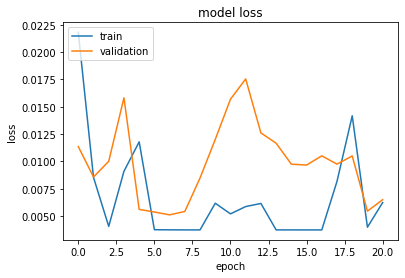

In [8]:
# Training history Statistics

print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Save

In [9]:
# Save model
model.save('classifier2B.h5') 

import h5py
# save history
h = h5py.File('../history/c_his_2B.h5')
d = history.history
for k, v in d.items():
    h.create_dataset(k, data=np.array(v, dtype=np.float32))

# Analysis

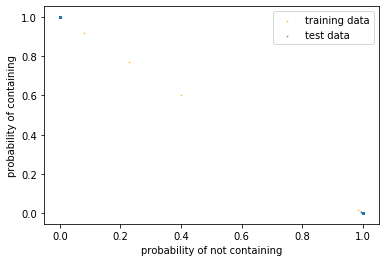

In [10]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

result_train = model.predict(X_train)
neg2 = result_train[0:,0] #first column
pos2 = result_train[0:,1] #second column

plt.scatter(neg2, pos2, s=1, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()